In [1]:
# Kaggle Competition-03

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

In [3]:
# Load dataset

In [4]:
df1=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df2=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

# Exploratory Data analysis

In [5]:
df1.shape,df2.shape

((8693, 14), (4277, 13))

In [6]:
df1['Transported'].isnull().sum()

0

In [7]:

df1.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [8]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
result=pd.DataFrame()
result['PassengerId']=df2['PassengerId']

In [10]:
df=df1.append(df2)

In [11]:
duplicates = df.duplicated()
duplicates.unique() # no duplicate entries

array([False])

In [12]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


In [13]:
df.shape

(12970, 14)

In [14]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


# Feature engineering

In [16]:
df['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 12970, dtype: object

In [17]:
df['Group']=df['PassengerId'].str[:4]

In [18]:
df['Group']

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
4272    9266
4273    9269
4274    9271
4275    9273
4276    9277
Name: Group, Length: 12970, dtype: object

In [19]:
df['Group'].value_counts()

6499    8
8728    8
0984    8
4256    8
6986    8
       ..
5190    1
5187    1
5186    1
5185    1
9277    1
Name: Group, Length: 9280, dtype: int64

In [20]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


In [21]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
Group              0
dtype: int64

In [22]:
df['RoomService'].value_counts()

0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64

In [23]:
df['FoodCourt'].value_counts()

0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, dtype: int64

In [24]:
df['ShoppingMall'].value_counts()

0.0       8331
1.0        225
2.0        112
3.0         94
4.0         69
          ... 
751.0        1
1573.0       1
1541.0       1
1661.0       1
3851.0       1
Name: ShoppingMall, Length: 1367, dtype: int64

In [25]:
df['Spa'].value_counts()

0.0       7935
1.0        218
2.0        148
3.0         82
4.0         73
          ... 
971.0        1
2290.0       1
1450.0       1
4517.0       1
1812.0       1
Name: Spa, Length: 1679, dtype: int64

In [26]:
df['VRDeck'].value_counts()

0.0       8252
1.0        211
2.0        108
3.0         89
5.0         68
          ... 
395.0        1
3186.0       1
2519.0       1
1652.0       1
494.0        1
Name: VRDeck, Length: 1642, dtype: int64

In [27]:
df['RoomService']=df['RoomService'].fillna('0').astype('float64')
df['FoodCourt']=df['FoodCourt'].fillna('0').astype('float64')
df['ShoppingMall']=df['ShoppingMall'].fillna('0').astype('float64')
df['Spa']=df['Spa'].fillna('0').astype('float64')
df['VRDeck']=df['VRDeck'].fillna('0').astype('float64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  Group         12970 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.6+ MB


In [29]:
df['luxury_bill_tot']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['VRDeck']+df['Spa']


In [30]:
df=df[['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','Name','Transported','Group','luxury_bill_tot']]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Group,luxury_bill_tot
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0001,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,0002,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,0003,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,0003,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,0004,1091.0


In [31]:
df.isnull().sum()

PassengerId           0
HomePlanet          288
CryoSleep           310
Cabin               299
Destination         274
Age                 270
VIP                 296
Name                294
Transported        4277
Group                 0
luxury_bill_tot       0
dtype: int64

<Axes: xlabel='Destination', ylabel='count'>

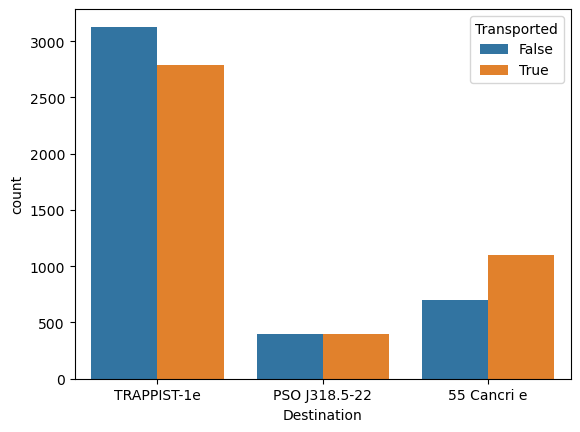

In [32]:
sns.countplot(x=df['Destination'],hue=df['Transported'])

<Axes: xlabel='VIP', ylabel='count'>

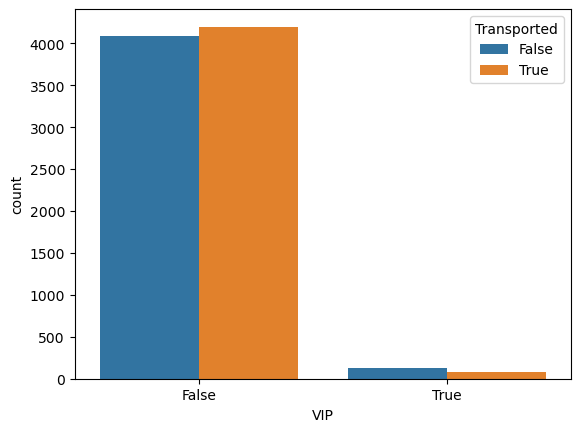

In [33]:
sns.countplot(x=df['VIP'],hue=df['Transported'])

In [34]:
df['VIP']=df['VIP'].fillna('False')

In [35]:
df=df.drop('Name',axis=1)

In [36]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Group,luxury_bill_tot
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,0001,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,0002,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,0003,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,0003,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,0004,1091.0


<Axes: xlabel='CryoSleep', ylabel='count'>

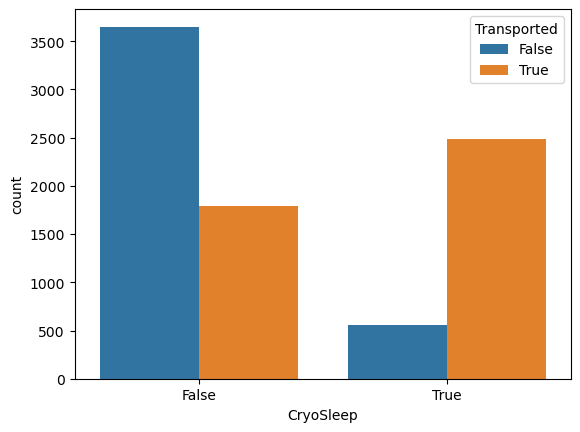

In [37]:
sns.countplot(x=df['CryoSleep'],hue=df['Transported'])

In [38]:
# create duck,side from Cabin

In [39]:
df['deck']=df['Cabin'].str.extract('([A-Za-z]+\/)',expand=False)
df['deck']=df['deck'].str.strip('/')
df['deck']

0         B
1         F
2         A
3         A
4         F
       ... 
4272      G
4273    NaN
4274      D
4275      D
4276      G
Name: deck, Length: 12970, dtype: object

In [40]:
df['side'] = df['Cabin'].str.extract('(/[PS])',expand=False)
df['side']=df['side'].str.strip('/')
df['side']

0         P
1         S
2         S
3         S
4         S
       ... 
4272      S
4273    NaN
4274      P
4275      P
4276      S
Name: side, Length: 12970, dtype: object

In [41]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Group,luxury_bill_tot,deck,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,0001,0.0,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,0002,736.0,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,0003,10383.0,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,0003,5176.0,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,0004,1091.0,F,S


In [42]:
df=df[['PassengerId','HomePlanet','CryoSleep','deck','side','Destination','Age','VIP','Transported','Group','luxury_bill_tot']]
df.head()

,PassengerId,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,Transported,Group,luxury_bill_tot
0,0001_01,Europa,False,B,P,TRAPPIST-1e,39.0,False,False,0001,0.0
1,0002_01,Earth,False,F,S,TRAPPIST-1e,24.0,False,True,0002,736.0
2,0003_01,Europa,False,A,S,TRAPPIST-1e,58.0,True,False,0003,10383.0
3,0003_02,Europa,False,A,S,TRAPPIST-1e,33.0,False,False,0003,5176.0
4,0004_01,Earth,False,F,S,TRAPPIST-1e,16.0,False,True,0004,1091.0


<Axes: xlabel='deck', ylabel='count'>

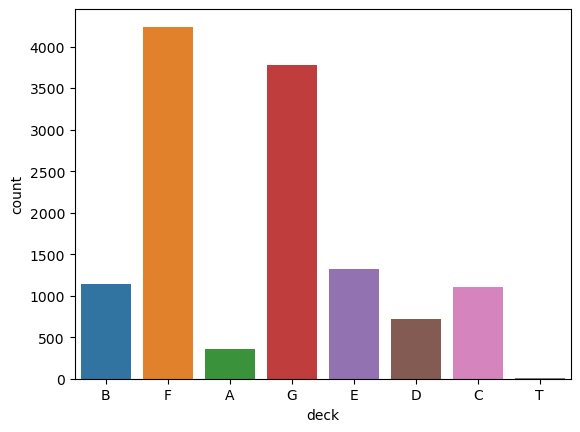

In [43]:
sns.countplot(x=df['deck'])

In [44]:
df['deck'].value_counts()

F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: deck, dtype: int64

In [45]:
total_null_values = df['deck'].isnull().sum()
half_null_values = total_null_values // 2

value1 = 'F'
value2 = 'G'

null_indices = df[df['deck'].isnull()].index

fill_indices1 = np.random.choice(null_indices, half_null_values, replace=False)
df.loc[fill_indices1, 'deck'] = value1
df['deck'].fillna(value2, inplace=True)


In [46]:
df['deck'].value_counts()

F    4456
G    3895
E    1308
B    1137
C    1095
D     717
A     351
T      11
Name: deck, dtype: int64

<Axes: xlabel='side', ylabel='count'>

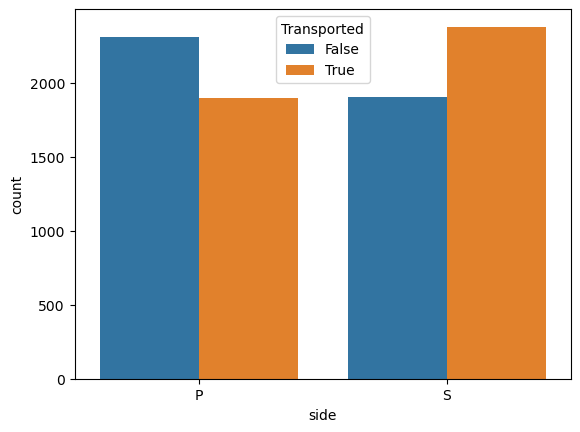

In [47]:
sns.countplot(x=df['side'],hue=df['Transported'])

In [48]:
df['side'].value_counts()

S    6381
P    6290
Name: side, dtype: int64

In [49]:
total_null_values = df['side'].isnull().sum()
half_null_values = total_null_values // 2

value1 = 'P'
value2 = 'S'

null_indices = df[df['side'].isnull()].index

fill_indices1 = np.random.choice(null_indices, half_null_values, replace=False)
df.loc[fill_indices1, 'side'] = value1
df['side'].fillna(value2, inplace=True)

In [50]:
df.isnull().sum()

PassengerId           0
HomePlanet          288
CryoSleep           310
deck                  0
side                  0
Destination         274
Age                 270
VIP                   0
Transported        4277
Group                 0
luxury_bill_tot       0
dtype: int64

<Axes: xlabel='HomePlanet', ylabel='count'>

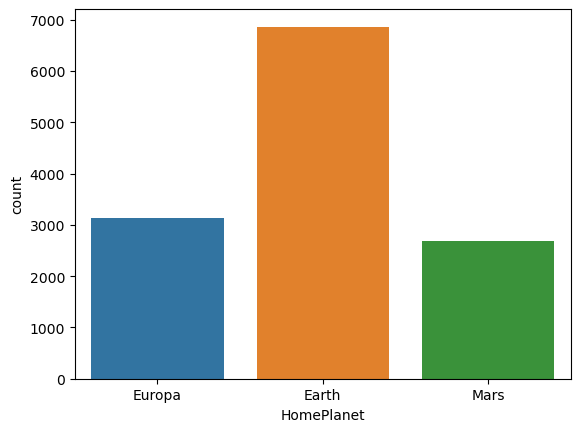

In [51]:
sns.countplot(x=df['HomePlanet'])

In [52]:

# Assuming your column is in a DataFrame called 'df'
column_name = 'HomePlanet'
total_null_values = df['HomePlanet'].isnull().sum()

# Calculate the number of null values to fill for each percentage
percentages = [53, 23, 19]
null_to_fill = [int(total_null_values * p / 100) for p in percentages]

# Create three masks for each percentage
mask1 = df['HomePlanet'].isnull() & (np.random.rand(len(df)) < null_to_fill[0] / total_null_values)
mask2 = df['HomePlanet'].isnull() & (np.random.rand(len(df)) < null_to_fill[1] / total_null_values)
mask3 = df['HomePlanet'].isnull() & (np.random.rand(len(df)) < null_to_fill[2] / total_null_values)

# Generate three sets of values for filling
fill_values_set1 = ['Earth']  # Replace with your own values
fill_values_set2 = ['Mars']  # Replace with your own values
fill_values_set3 = ['Europa']  # Replace with your own values

# Assign values from the first set to the corresponding null values using mask1
df.loc[mask1, 'HomePlanet'] = np.random.choice(fill_values_set1, size=mask1.sum(), replace=True)

# Assign values from the second set to the corresponding null values using mask2
df.loc[mask2, 'HomePlanet'] = np.random.choice(fill_values_set2, size=mask2.sum(), replace=True)

# Assign values from the third set to the corresponding null values using mask3
df.loc[mask3, 'HomePlanet'] = np.random.choice(fill_values_set3, size=mask3.sum(), replace=True)


In [53]:
df.isnull().sum()

PassengerId           0
HomePlanet           88
CryoSleep           310
deck                  0
side                  0
Destination         274
Age                 270
VIP                   0
Transported        4277
Group                 0
luxury_bill_tot       0
dtype: int64

In [54]:
df['HomePlanet']=df['HomePlanet'].fillna('Earth')

<Axes: xlabel='HomePlanet', ylabel='count'>

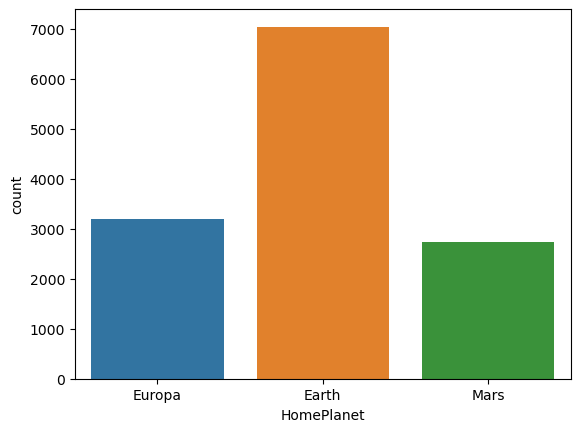

In [55]:
sns.countplot(x=df['HomePlanet'])

In [56]:
df.groupby('HomePlanet')['Age'].median()

HomePlanet
Earth     23.0
Europa    32.0
Mars      28.0
Name: Age, dtype: float64

In [57]:
df['Age']=df['Age'].fillna(df.groupby('HomePlanet')['Age'].transform('median'))

In [58]:
df.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep           310
deck                  0
side                  0
Destination         274
Age                   0
VIP                   0
Transported        4277
Group                 0
luxury_bill_tot       0
dtype: int64

<Axes: xlabel='CryoSleep', ylabel='count'>

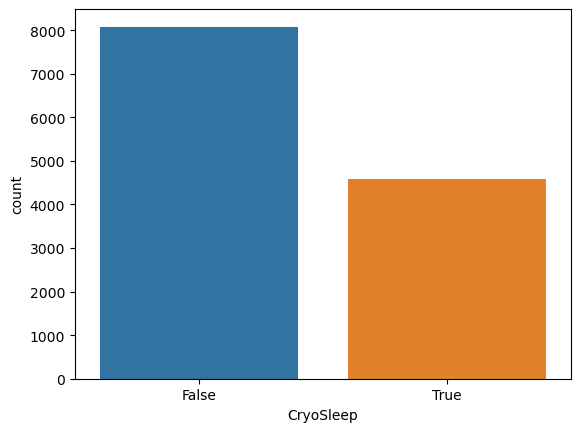

In [59]:
sns.countplot(x=df['CryoSleep'])

In [60]:
8000/df.shape[0],4500/df.shape[0]

(0.6168080185042406, 0.3469545104086353)

In [61]:
# Assuming your column is in a DataFrame called 'df'
column_name = 'CryoSleep'
total_null_values = df['CryoSleep'].isnull().sum()

# Calculate the number of null values to fill for each percentage
percentages = [62,35]
null_to_fill = [int(total_null_values * p / 100) for p in percentages]

# Create three masks for each percentage
mask1 = df['CryoSleep'].isnull() & (np.random.rand(len(df)) < null_to_fill[0] / total_null_values)
mask2 = df['CryoSleep'].isnull() & (np.random.rand(len(df)) < null_to_fill[1] / total_null_values)

# Generate three sets of values for filling
fill_values_set1 = ['False']  # Replace with your own values
fill_values_set2 = ['True']   # Replace with your own values
  # Replace with your own values

# Assign values from the first set to the corresponding null values using mask1
df.loc[mask1, 'CryoSleep'] = np.random.choice(fill_values_set1, size=mask1.sum(), replace=True)

# Assign values from the second set to the corresponding null values using mask2
df.loc[mask2, 'CryoSleep'] = np.random.choice(fill_values_set2, size=mask2.sum(), replace=True)


In [62]:
df.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep            82
deck                  0
side                  0
Destination         274
Age                   0
VIP                   0
Transported        4277
Group                 0
luxury_bill_tot       0
dtype: int64

In [63]:
df['CryoSleep']=df['CryoSleep'].fillna('False')

In [64]:
df.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
deck                  0
side                  0
Destination         274
Age                   0
VIP                   0
Transported        4277
Group                 0
luxury_bill_tot       0
dtype: int64

<Axes: xlabel='Destination', ylabel='count'>

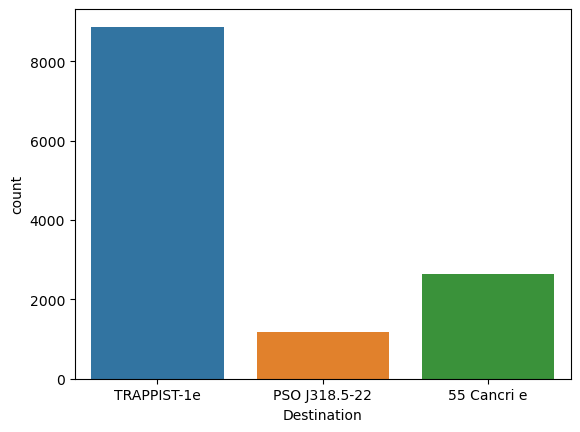

In [65]:
sns.countplot(x=df['Destination'])

In [66]:
8500/df.shape[0],1000/df.shape[0],2300/df.shape[0]

(0.6553585196607556, 0.07710100231303008, 0.17733230531996916)

In [67]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [68]:

# Assuming your column is in a DataFrame called 'df'
column_name = 'Destination'
total_null_values = df['Destination'].isnull().sum()

# Calculate the number of null values to fill for each percentage
percentages = [65, 7, 17]
null_to_fill = [int(total_null_values * p / 100) for p in percentages]

# Create three masks for each percentage
mask1 = df['Destination'].isnull() & (np.random.rand(len(df)) < null_to_fill[0] / total_null_values)
mask2 = df['Destination'].isnull() & (np.random.rand(len(df)) < null_to_fill[1] / total_null_values)
mask3 = df['Destination'].isnull() & (np.random.rand(len(df)) < null_to_fill[2] / total_null_values)

# Generate three sets of values for filling
fill_values_set1 = ['TRAPPIST-1e']  # Replace with your own values
fill_values_set2 = ['PSO J318.5-22']  # Replace with your own values
fill_values_set3 = ['55 Cancri e']  # Replace with your own values

# Assign values from the first set to the corresponding null values using mask1
df.loc[mask1, 'Destination'] = np.random.choice(fill_values_set1, size=mask1.sum(), replace=True)

# Assign values from the second set to the corresponding null values using mask2
df.loc[mask2, 'Destination'] = np.random.choice(fill_values_set2, size=mask2.sum(), replace=True)

# Assign values from the third set to the corresponding null values using mask3
df.loc[mask3, 'Destination'] = np.random.choice(fill_values_set3, size=mask3.sum(), replace=True)

In [69]:
df.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
deck                  0
side                  0
Destination          65
Age                   0
VIP                   0
Transported        4277
Group                 0
luxury_bill_tot       0
dtype: int64

In [70]:
df['Destination']=df['Destination'].fillna('TRAPPIST-1e')

In [71]:
df.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
deck                  0
side                  0
Destination           0
Age                   0
VIP                   0
Transported        4277
Group                 0
luxury_bill_tot       0
dtype: int64

# modelling

In [72]:
df=df[['HomePlanet','CryoSleep','deck','side','Destination','Age','VIP','Group','luxury_bill_tot']]
df.head()

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,Group,luxury_bill_tot
0,Europa,False,B,P,TRAPPIST-1e,39.0,False,0001,0.0
1,Earth,False,F,S,TRAPPIST-1e,24.0,False,0002,736.0
2,Europa,False,A,S,TRAPPIST-1e,58.0,True,0003,10383.0
3,Europa,False,A,S,TRAPPIST-1e,33.0,False,0003,5176.0
4,Earth,False,F,S,TRAPPIST-1e,16.0,False,0004,1091.0


In [73]:
df['VIP'] = df['VIP'].replace({'False': False, 'True': True}).astype(str)
df['CryoSleep'] = df['CryoSleep'].replace({'False': False, 'True': True}).astype(str)


In [74]:
df['CryoSleep'].unique()

array(['False', 'True'], dtype=object)

In [75]:
df['VIP'].unique()

array(['False', 'True'], dtype=object)

In [76]:
data=pd.get_dummies(df,drop_first=True)
data

,Age,luxury_bill_tot,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Group_0002,Group_0003,Group_0004,Group_0005,Group_0006,Group_0007,Group_0008,Group_0009,Group_0010,Group_0011,Group_0012,Group_0013,Group_0014,Group_0015,Group_0016,Group_0017,Group_0018,Group_0019,Group_0020,Group_0021,Group_0022,Group_0023,Group_0024,Group_0025,Group_0026,Group_0027,Group_0028,Group_0029,Group_0030,Group_0031,Group_0032,Group_0033,Group_0034,Group_0035,...,Group_9231,Group_9232,Group_9233,Group_9234,Group_9235,Group_9236,Group_9237,Group_9238,Group_9239,Group_9240,Group_9241,Group_9242,Group_9243,Group_9244,Group_9245,Group_9246,Group_9247,Group_9248,Group_9249,Group_9250,Group_9251,Group_9252,Group_9253,Group_9254,Group_9255,Group_9256,Group_9257,Group_9258,Group_9259,Group_9260,Group_9261,Group_9262,Group_9263,Group_9264,Group_9265,Group_9266,Group_9267,Group_9268,Group_9269,Group_9270,Group_9271,Group_9272,Group_9273,Group_9274,Group_9275,Group_9276,Group_9277,Group_9278,Group_9279,Group_9280
0,39.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24.0,736.0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,58.0,10383.0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,33.0,5176.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16.0,1091.0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4273,42.0,1018.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4274,28.0,0.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4275,32.0,3203.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [78]:
dc={'False':0,'True':1}
df1['Transported']=df1['Transported'].astype(str).map(dc)
df1['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [79]:
x_train=data[:df1.shape[0]]
x_test=data[df1.shape[0]:]

y_train=df1['Transported']

In [80]:
 !pip install xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
g=GaussianNB()
lr=LogisticRegression()
dc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()

In [82]:
result=pd.DataFrame()
result['PassengerId']=df2['PassengerId']


In [86]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
result['Transported']=pred
result 

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,0


In [87]:
di={1:'True',0:'False'}
result['Transported']=result['Transported'].map(di)
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [88]:
result.to_csv('spaceship_titanic.csv',index=False)